In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# font = {'size'   : 12}
# plt.rc('font', **font)

# colors={
#     2:'#006BA4',
#     3:'#FF800E',
#     4:'#ABABAB',
#     "A":'#FFBC79',
#     "B":'#5F9ED1',
#     "C":'#C85200',
#     6:'#898989',
#     7:'#A2C8EC',
#     8:'#595959',
#     9:'#CFCFCF'
# }

# markers={
#     2:"o", 
#     3:"d", 
#     4:"v", 
#     "A":"x", 
#     "B":"<", 
#     "C":"^", 
# }

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica",
#     'font.size'  : 22
# })
# plt.rc('font',family='Times New Roman')

In [3]:
prop8 = np.loadtxt("prop8.dat")

In [4]:
coord8 = np.loadtxt("../../dats/dual_coords_n8_singlepatch.dat")

(-0.2, 0.2)

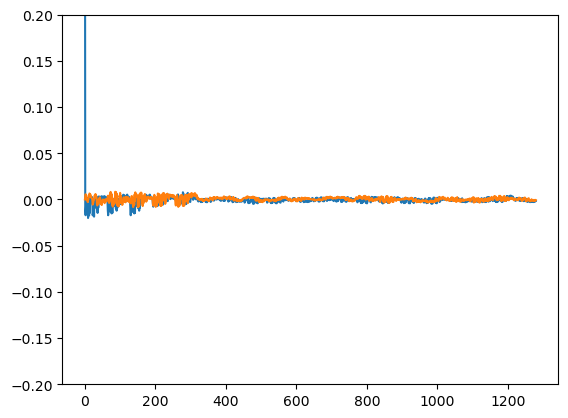

In [5]:
plt.plot( prop8[::2] )

plt.ylim(-0.2, 0.2)

(-0.2, 0.2)

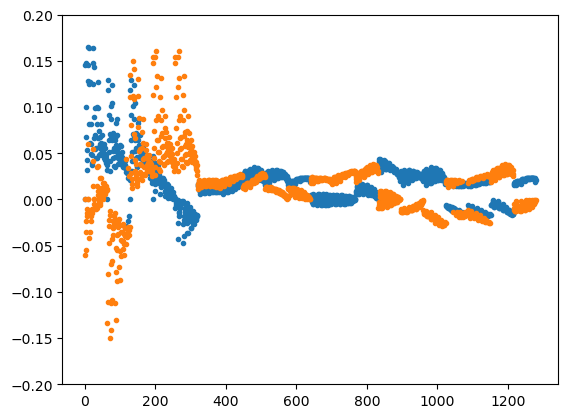

In [8]:
plt.plot( prop8[1::2], ls="none", marker="." )

plt.ylim(-0.2, 0.2)

In [ ]:
plt.plot( coord8 )

In [ ]:
n_sites = coord8.shape[0]

In [7]:
spn=0
lis = np.array([ [ coord8[ix][0], coord8[ix][1], prop8[int(ix/2)+spn][0], prop8[int(ix/2)+spn][1] ] for ix in np.arange(n_sites) ])

NameError: name 'n_sites' is not defined

In [10]:
prop8.shape

(2560, 2)

In [11]:
coord8

array([[0.06453199, 1.88495559],
       [0.18497243, 1.47798259],
       [0.32567336, 1.38931345],
       ...,
       [2.17687127, 1.63295502],
       [2.08626895, 1.84137626],
       [2.14076542, 1.79183473]])

In [12]:
lis

array([[ 6.45319852e-02,  1.88495559e+00,  5.00068685e-01,
         6.39355802e-10],
       [ 1.84972429e-01,  1.47798259e+00,  5.00068685e-01,
         6.39355802e-10],
       [ 3.25673357e-01,  1.38931345e+00,  3.15869099e-05,
         5.23587835e-13],
       ...,
       [ 2.17687127e+00,  1.63295502e+00,  8.54210920e-04,
         2.88689548e-03],
       [ 2.08626895e+00,  1.84137626e+00, -1.81263411e-02,
         3.08614591e-02],
       [ 2.14076542e+00,  1.79183473e+00, -1.81263411e-02,
         3.08614591e-02]])

In [13]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

In [14]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

/tmp/ipykernel_7568/2802252339.py:13: UserWarning: Attempt to set non-positive zlim on a log-scaled axis will be ignored.
  ax.set_zscale('log')


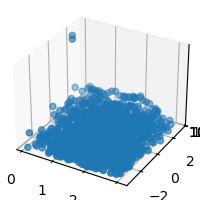

In [23]:
plt.style.use('_mpl-gallery-nogrid')

# make data
X = lis.T[0]
Y = lis.T[1]
Z = np.sqrt(lis.T[2]**2 + lis.T[3]**2)
# Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(X, Y, np.abs(Z))

ax.set_zscale('log')

plt.show()

In [16]:
np.min(Y)

-3.141592653589793

In [17]:
X = lis.T[0]
phi = lis.T[1]
Z = lis.T[2]

In [18]:
X.shape

(1280,)

In [19]:
x.shape

NameError: name 'x' is not defined

In [ ]:
y.shape

In [ ]:
z.shape

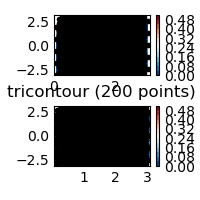

In [22]:
import matplotlib.tri as tri

np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
# x = np.random.uniform(-2, 2, npts)
# y = np.random.uniform(-2, 2, npts)
# z = x * np.exp(-x**2 - y**2)
x = lis.T[0]
y = lis.T[1]
z = np.sqrt(lis.T[2]**2 + lis.T[3]**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(0.0, np.pi, ngridx)
yi = np.linspace(-np.pi, np.pi, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(0.0, np.pi), ylim=(-np.pi, np.pi))
# ax1.set_title('grid and contour (%d points, %d grid points)' %
#               (npts, ngridx * ngridy))

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
#ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


In [21]:
X.shape

(100, 100)

In [22]:
Y.shape

(100, 100)

In [23]:
Z.shape

(100, 100)

In [24]:
X

array([[-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-2.93939394, -2.93939394, -2.93939394, ..., -2.93939394,
        -2.93939394, -2.93939394],
       [-2.87878788, -2.87878788, -2.87878788, ..., -2.87878788,
        -2.87878788, -2.87878788],
       ...,
       [ 2.87878788,  2.87878788,  2.87878788, ...,  2.87878788,
         2.87878788,  2.87878788],
       [ 2.93939394,  2.93939394,  2.93939394, ...,  2.93939394,
         2.93939394,  2.93939394],
       [ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ]])

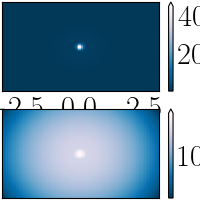

In [20]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as colors

N=100

X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z, cmap='PuBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[0], extend='max', label='linear scaling')

pcm = ax[1].pcolor(X, Y, Z, cmap='PuBu_r', shading='nearest',
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
fig.colorbar(pcm, ax=ax[1], extend='max', label='LogNorm')

In [17]:
data2d

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.14188251e-03,  6.14176666e-03,  6.14141913e-03, ...,
         6.14141913e-03,  6.14176666e-03,  6.14188251e-03],
       [ 1.22835333e-02,  1.22833016e-02,  1.22826066e-02, ...,
         1.22826066e-02,  1.22833016e-02,  1.22835333e-02],
       ...,
       [-1.22835333e-02, -1.22833016e-02, -1.22826066e-02, ...,
        -1.22826066e-02, -1.22833016e-02, -1.22835333e-02],
       [-6.14188251e-03, -6.14176666e-03, -6.14141913e-03, ...,
        -6.14141913e-03, -6.14176666e-03, -6.14188251e-03],
       [-2.44929360e-16, -2.44924740e-16, -2.44910881e-16, ...,
        -2.44910881e-16, -2.44924740e-16, -2.44929360e-16]])